In [17]:
# Install package

%%capture
!pip install bioinfokit

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster
from sklearn.cluster import DBSCAN

In [18]:
# Import data

df = pd.read_csv('/content/drive/MyDrive/DS Course Uploads/Datasets/Breast_GSE45827.csv')
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


### EDA

In [19]:
df.select_dtypes(include='object').columns

Index(['type'], dtype='object')

In [20]:
df.type.value_counts()

,count
type,
basal,41
HER,30
luminal_B,30
luminal_A,29
cell_line,14
normal,7


In [21]:
df.isnull().sum().any() == True

False

In [22]:
df.duplicated().sum()

0

In [23]:
# drop first column as it is just id

df.drop('samples', axis=1, inplace=True)

In [24]:
# Implement one hot encoding for type field

df = pd.get_dummies(df, columns=['type'], dtype=int)
df.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type_HER,type_basal,type_cell_line,type_luminal_A,type_luminal_B,type_normal
0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,...,4.901594,2.966657,3.508495,3.301999,0,1,0,0,0,0
1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,...,5.405839,2.934763,3.687666,3.064299,0,1,0,0,0,0
2,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,...,5.184286,2.847684,3.550597,3.158535,0,1,0,0,0,0
3,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,5.086569,3.031602,3.524981,3.272665,0,1,0,0,0,0
4,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,3.368243,...,5.235318,2.956232,3.445501,3.193947,0,1,0,0,0,0


### Using TSNE and Modelling with DBSCAN

In [25]:
tsne = TSNE(n_components=2).fit_transform(df)
cluster.tsneplot(score=tsne)

In [39]:
model = DBSCAN(eps=12, min_samples=100)
model.fit(df)
clusters = model.fit_predict(df)
set(clusters)

{-1}

DBSCAN didn't work on this data, so using KMeans Clustering

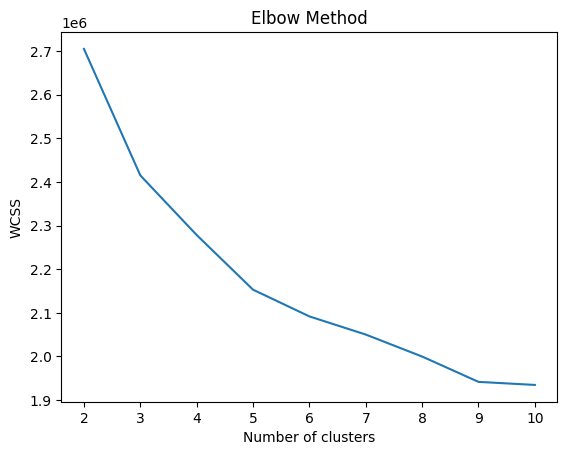

In [40]:
# Try using KMeans

from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
model = KMeans(5, random_state=42, n_init=10)
model.fit(df)
clusters = model.fit_predict(df)
set(clusters)

{0, 1, 2, 3, 4}

In [50]:
# Create new dataframe

df_new = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])
df_new['cluster'] = clusters
df_new.cluster.value_counts()

,count
cluster,
2,56
0,39
3,35
4,14
1,7


### Visualization

<Axes: xlabel='tsne1', ylabel='tsne2'>

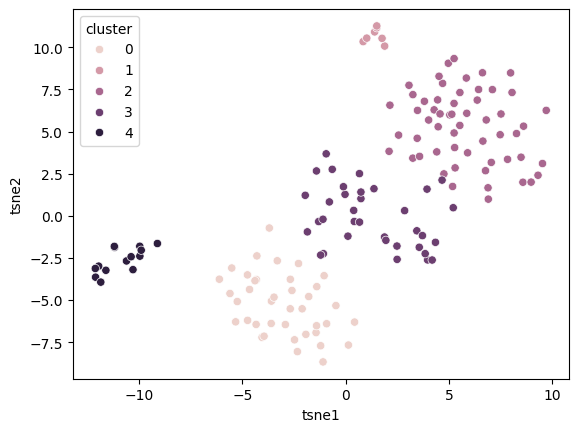

In [51]:
# scatterplot

sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df_new)